In [1]:
# this code is generated by the Domino Code Assist toolbar button
import domino_code_assist as dca
dca.init()

Cannot show ipywidgets in text

In [2]:
#https://www.kaggle.com/code/gustavofelici/heartbeats-heart-attack-analysis-prediction

# Project Description
HeartBeats 💓🔍: Unraveling the Rhythm of Heart Attack Analysis & Prediction

## Overview
Welcome to HeartBeats 💓🔍! In this data science project, we embark on a captivating journey to explore the world of heart attack analysis and prediction. Our aim is to gain valuable insights into the factors that contribute to heart attacks and develop an accurate predictive model to assess the risk of heart attack occurrence. Through a comprehensive workflow of data exploration, visualization, feature engineering, and machine learning, we seek to uncover the rhythm behind this critical cardiovascular event.

## Dataset
Our dataset contains a wealth of information related to heart health, including various patient attributes, lifestyle factors, and medical indicators. It provides a unique opportunity to understand the interplay between these factors and the occurrence of heart attacks. By harnessing the power of data, we strive to bring clarity to this intricate medical challenge.

## Key Objectives

#### **Data Exploration**
We will start by diving deep into the dataset, unearthing meaningful patterns and relationships between the variables. Through insightful visualizations, we aim to gain a comprehensive understanding of the data landscape.

#### **Feature Engineering**
Armed with domain knowledge and creative thinking, we will engineer new features to enhance the predictive power of our model. Crafting relevant features is like composing the melody that guides our heart attack prediction.

#### **Machine Learning Model**
Leveraging advanced machine learning algorithms, we will build a robust predictive model to anticipate heart attack occurrences. Our model will learn from the past to pave the way for a healthier future.

#### **Model Evaluation**
Rigorous evaluation of our model's performance will be conducted to ensure its reliability and accuracy. We will fine-tune the model's parameters to strike the right chord in predicting heart attack risks.

#### **Insights & Interpretations**
Throughout the project, we will uncover fascinating insights into the factors that influence heart attack occurrences. By interpreting our model's outcomes, we hope to unlock novel perspectives on heart health.

#### **Impact & Implications**
HeartBeats 💓🔍 aspires to make a significant impact on the field of cardiovascular health. Our findings can empower healthcare professionals with better risk assessment tools, allowing for proactive interventions and potentially saving lives. Moreover, the knowledge gained from this project may foster public awareness about heart health and inspire lifestyle improvements.

### **Join the Rhythm**
We invite all data enthusiasts, medical professionals, and passionate learners to join us in the HeartBeats 💓🔍 project. Together, we will unravel the mysteries surrounding heart attacks and endeavor to create a harmonious symphony of data-driven insights. Let's take this journey to the rhythm of the heart! ❤️🚀

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/mnt/data/Heart-Attack-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/mnt/data/Heart-Attack-prediction/heart.csv


In [4]:
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/mnt/data/Heart-Attack-prediction/heart.csv')

data.shape

(303, 14)

In [6]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


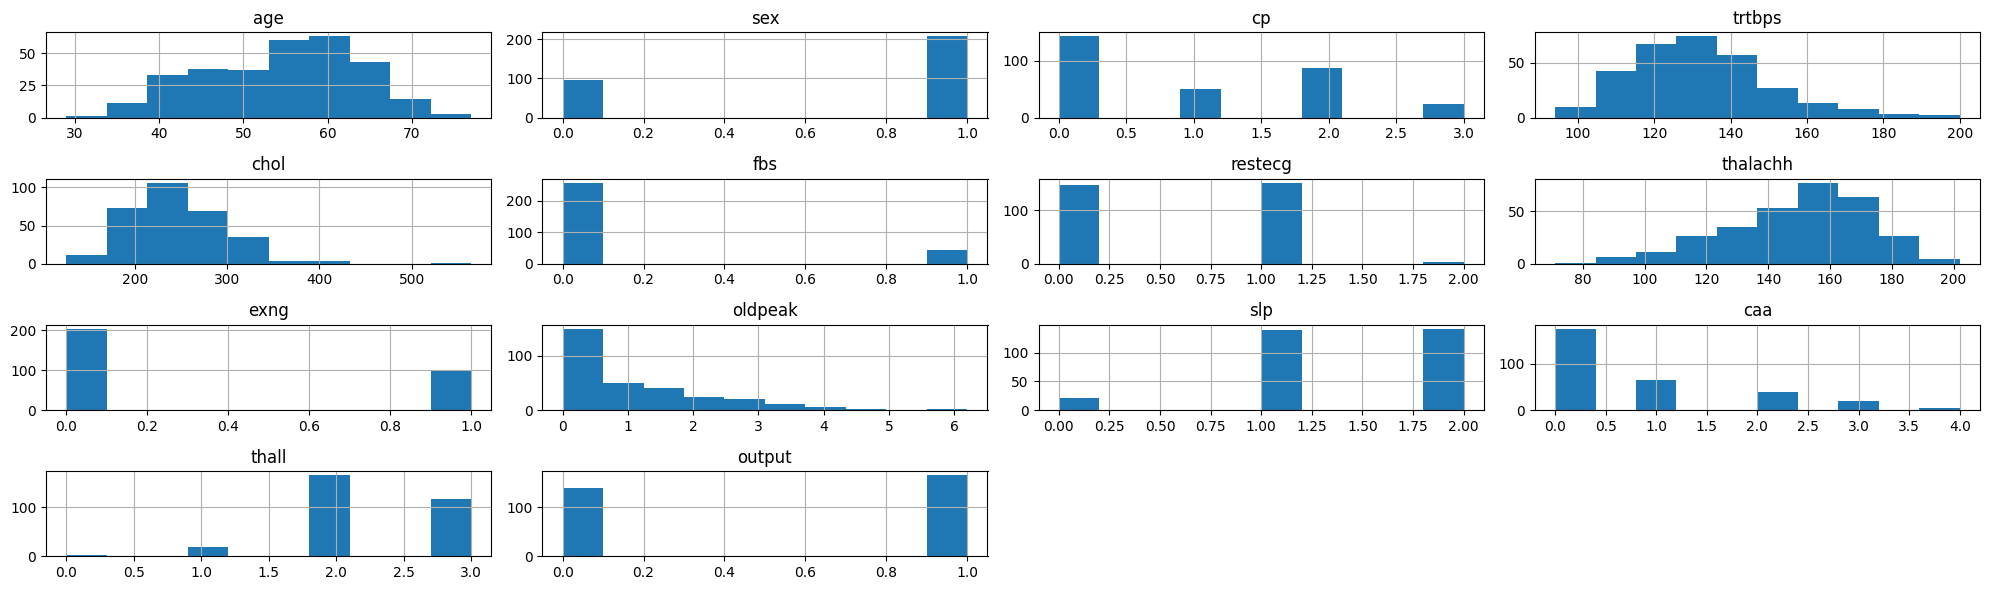

In [7]:
data.hist( figsize=(20, 6) )
plt.tight_layout()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Separing Features

In [10]:
num_vars = [ 'age', 'trtbps', 'chol', 'thalachh', 'oldpeak' ]
cat_vars = [ 'sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall' ]
target = 'output'

# Univariate

## Target

<Axes: xlabel='output', ylabel='count'>

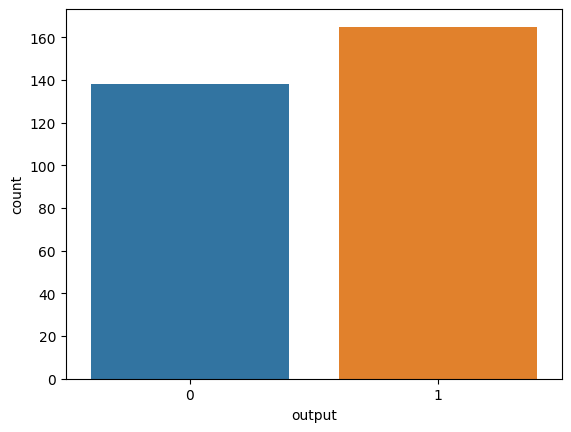

In [11]:
sns.countplot(data, x=target)

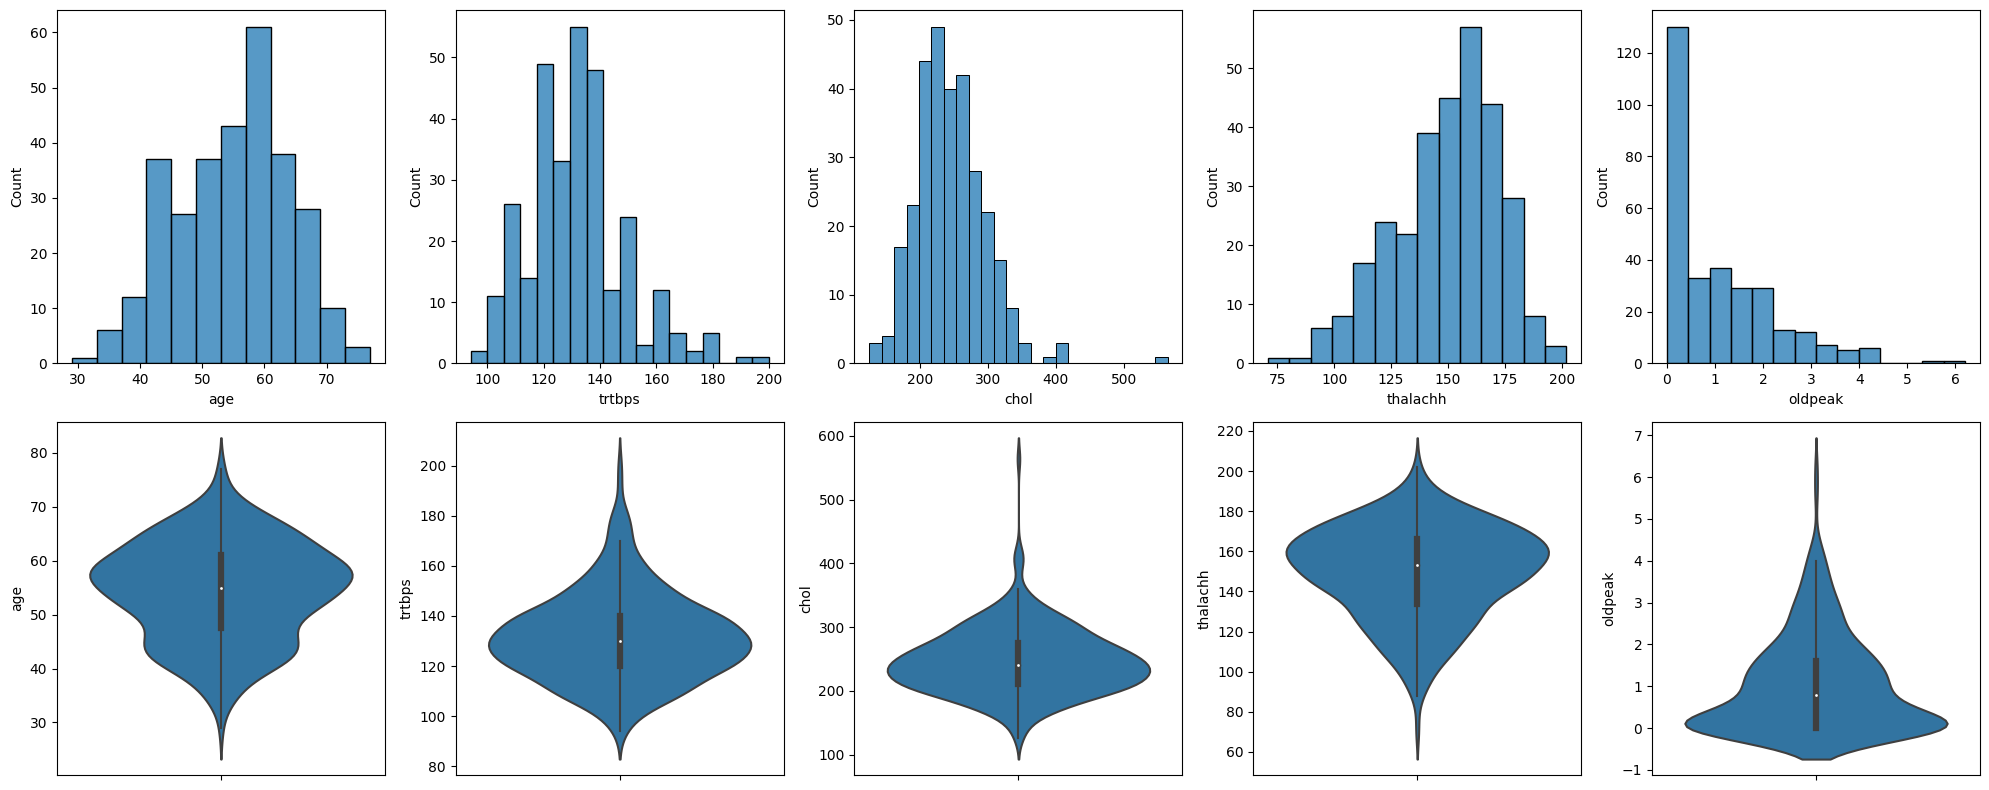

In [12]:
fig, axs = plt.subplots(2,5, figsize=(20,8))
axs = axs.ravel()

for i, feature in enumerate(num_vars):
    sns.histplot(data, x=feature, ax=axs[i])
    sns.violinplot(data, y=feature, ax=axs[i+5])

plt.tight_layout()

# Categorical Features

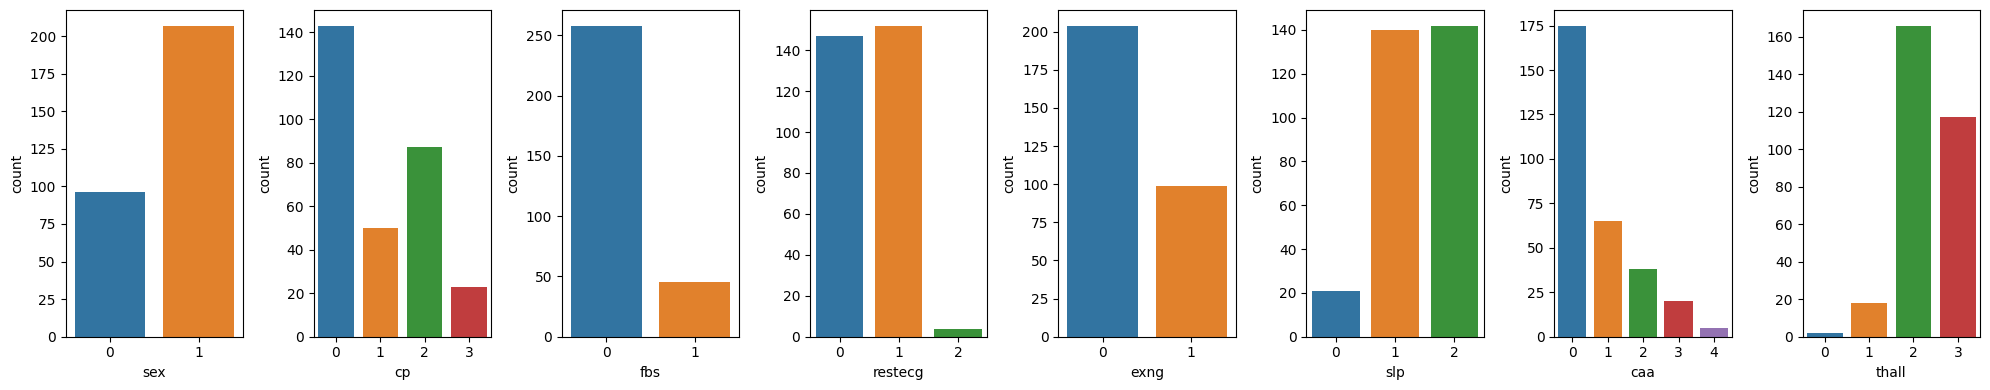

In [13]:
fig, axs = plt.subplots(ncols=8, figsize=(20,4))
axs = axs.ravel()

for i, feature in enumerate(cat_vars):
    sns.countplot(data, x=feature, ax=axs[i])

plt.tight_layout()

# Bivariate

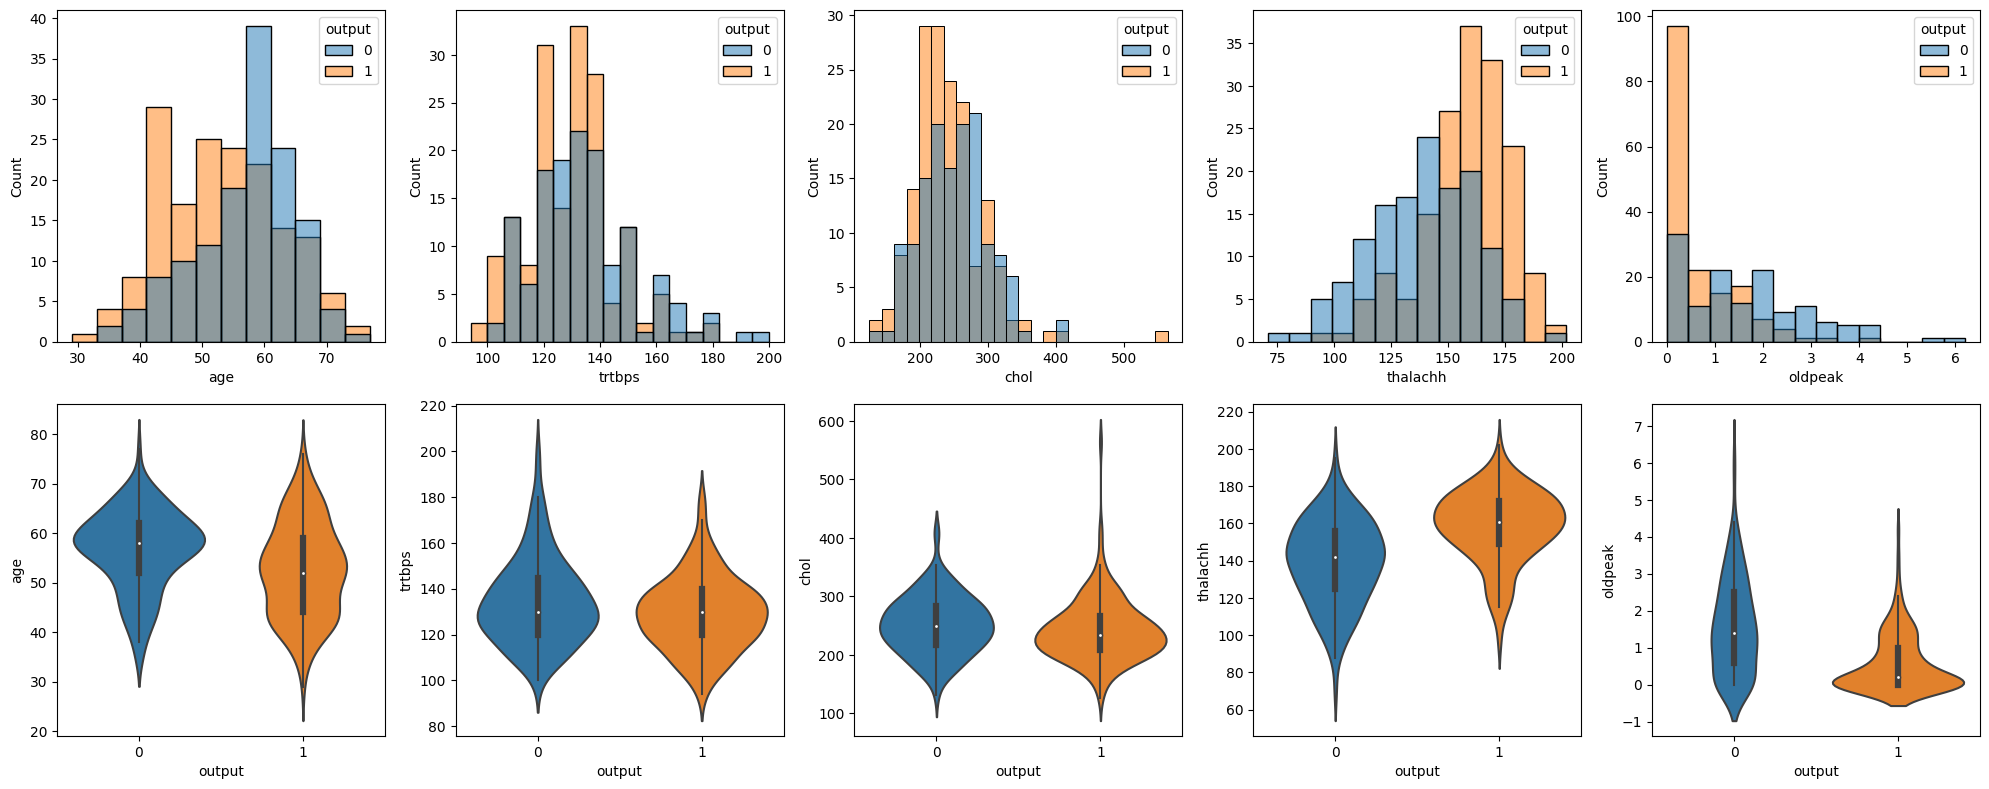

In [14]:
fig, axs = plt.subplots(2,5, figsize=(20,8))
axs = axs.ravel()

for i, feature in enumerate(num_vars):
    sns.histplot(data, x=feature, hue=target, ax=axs[i])
    sns.violinplot(data, y=feature, x=target, ax=axs[i+5])

plt.tight_layout()

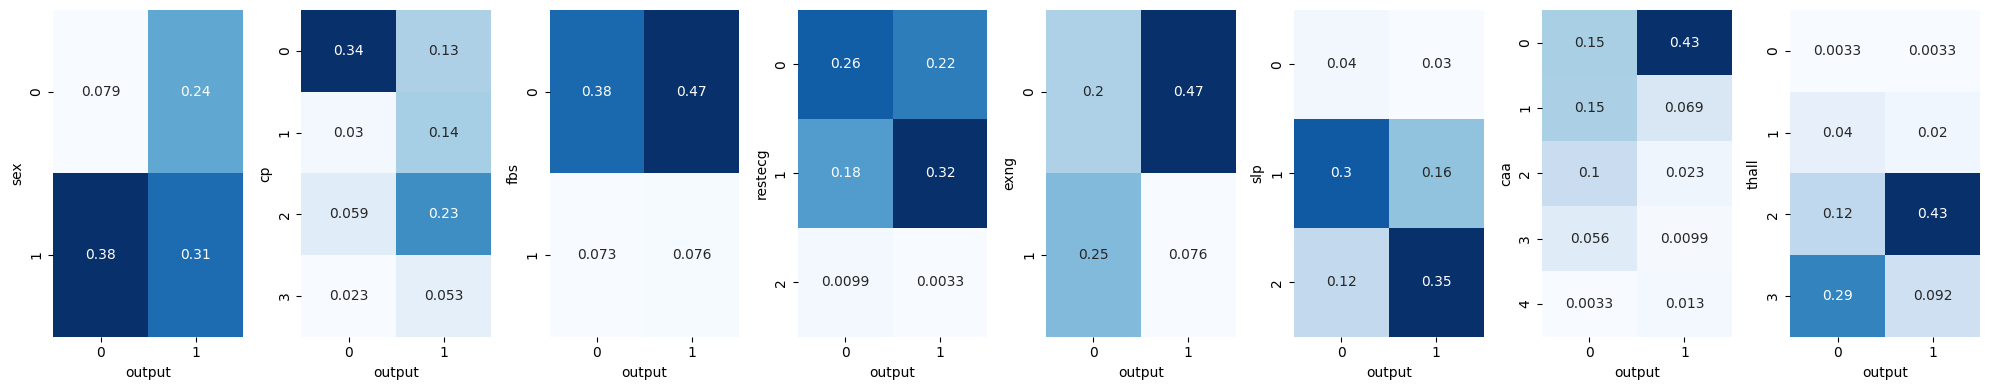

In [15]:
fig, axs = plt.subplots(ncols=8, figsize=(20,4))
axs = axs.ravel()

for i, feature in enumerate(cat_vars):
    crosstab = pd.crosstab( data[feature], data.output, normalize=True )
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False, ax=axs[i])

plt.tight_layout()

# Correlation

In [16]:
OneHotEncoder??

Object `OneHotEncoder` not found.


In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False)

cat_encoded = one_hot.fit_transform( data[ cat_vars ] )
vars_names = one_hot.get_feature_names_out()

data_cat = pd.DataFrame( cat_encoded, columns=vars_names )
data_corr = pd.concat( [ data.drop(cat_vars, axis=1).reset_index(drop=True), data_cat ], axis=1 )

# ---------------------------------------------------------------------------------------------

vars_corr = data_corr.drop( target, axis=1 ).corr()
target_corr = data_corr.corr()[ target ].drop(target, axis=0).sort_values(ascending=False)

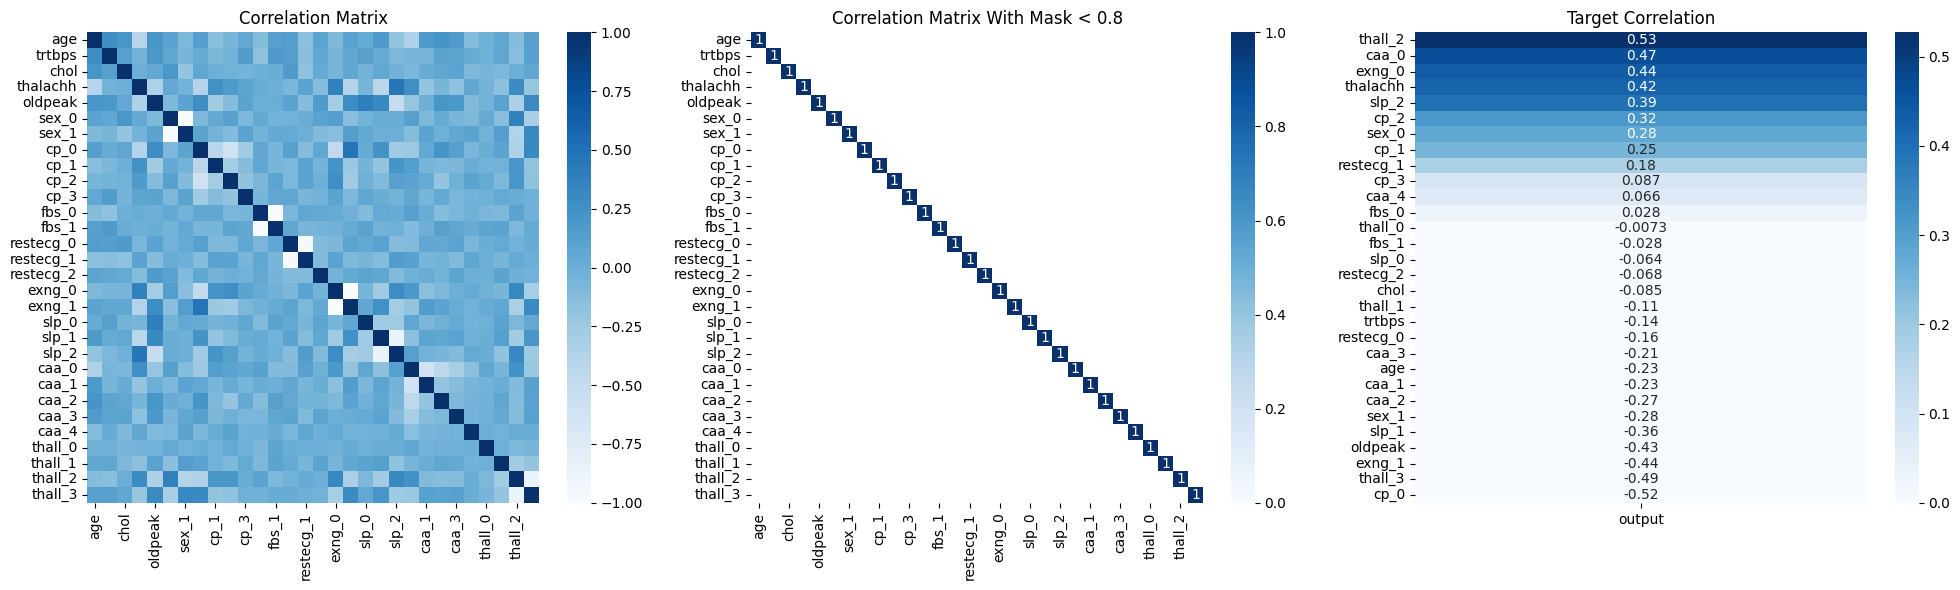

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(20,6))

sns.heatmap( vars_corr, cmap='Blues', ax=axs[0] )
axs[0].set_title( 'Correlation Matrix' )

sns.heatmap( vars_corr, cmap='Blues', mask=vars_corr < 0.8, annot=True, ax=axs[1], vmin=0 )
axs[1].set_title( 'Correlation Matrix With Mask < 0.8' )

sns.heatmap( pd.DataFrame(target_corr), cmap='Blues', annot=True, vmin=0, ax=axs[2] )
axs[2].set_title( 'Target Correlation' )

plt.tight_layout()

# Modeling

In [19]:
X = data.drop(target, axis=1)
y = data[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25 )
print('X size: ', X.shape[0])
print('Train size: ', X_train.shape[0])
print('Test size: ', X_test.shape[0])

X size:  303
Train size:  227
Test size:  76


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [21]:
ct = ColumnTransformer(
    [("cat", OneHotEncoder(), cat_vars),
    ("num", StandardScaler(), num_vars)])

model = make_pipeline( ct, DecisionTreeClassifier() )

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exng', 'slp',
                                                   'caa', 'thall']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'trtbps', 'chol',
                                                   'thalachh', 'oldpeak'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [22]:
model.fit( X_train, y_train )
y_pred = model.predict( X_test )

print( classification_report( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        33
           1       0.82      0.77      0.80        43

    accuracy                           0.78        76
   macro avg       0.77      0.78      0.77        76
weighted avg       0.78      0.78      0.78        76



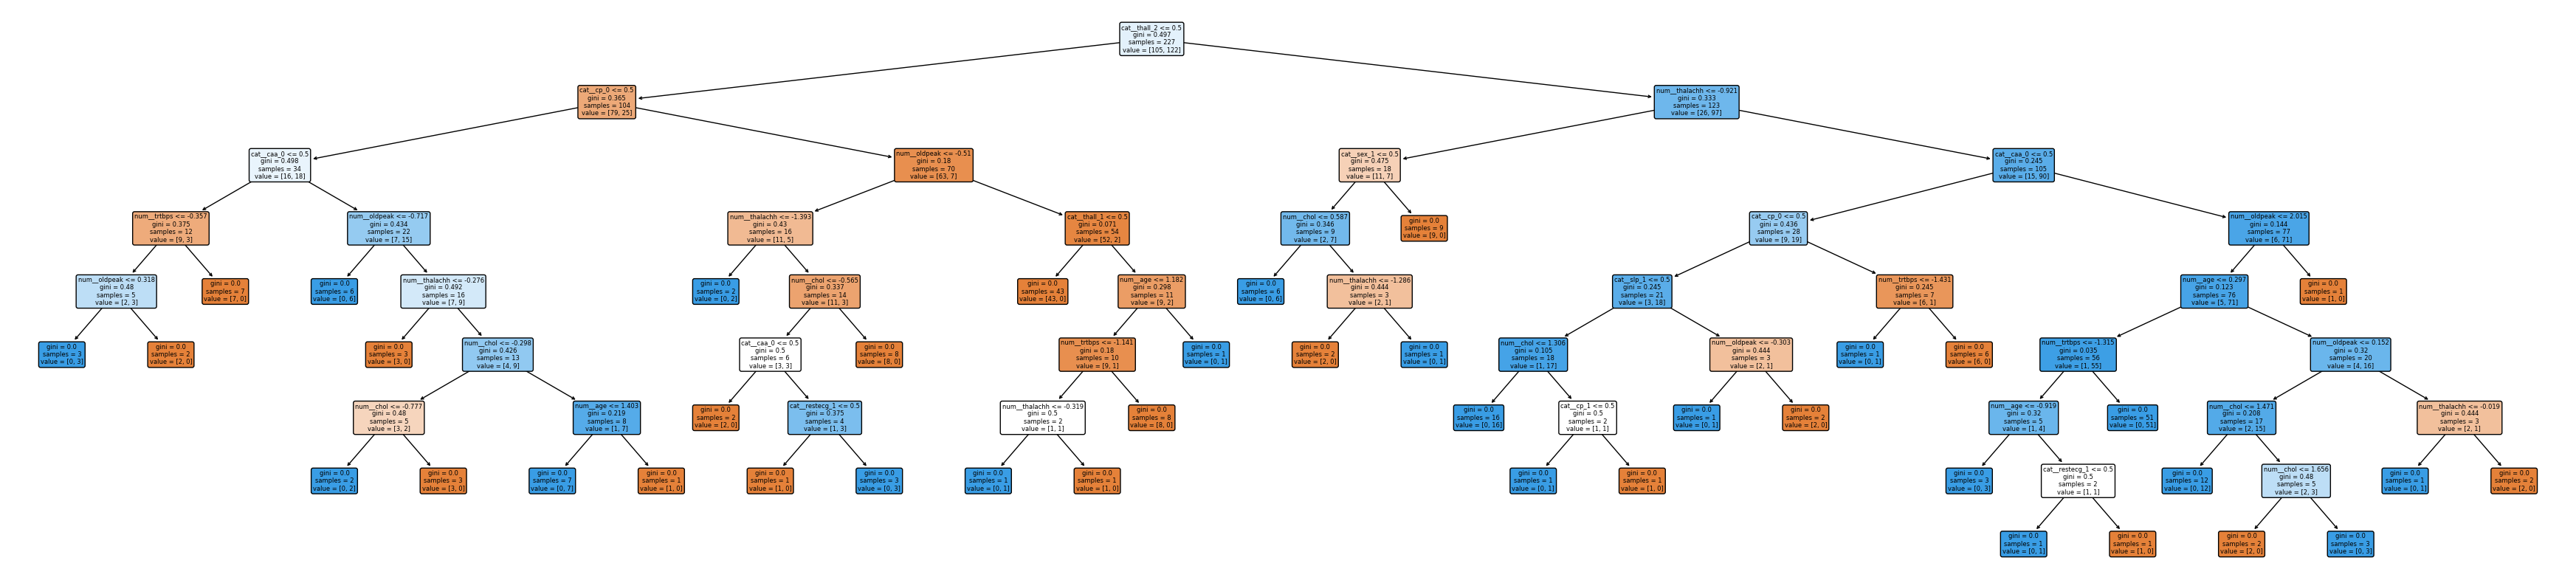

In [23]:
tree_classifier = model.named_steps['decisiontreeclassifier']

feature_names = ct.get_feature_names_out()

plt.figure(figsize=(35, 8))
plot_tree(tree_classifier, feature_names=feature_names, filled=True, rounded=True, fontsize=6)

plt.tight_layout()

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'GBC' : GradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'LGBM': LGBMClassifier(),
    'Cat': CatBoostClassifier(verbose=False)
}

In [26]:
model.get_params()


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                    ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp',
                                     'caa', 'thall']),
                                   ('num', StandardScaler(),
                                    ['age', 'trtbps', 'chol', 'thalachh',
                                     'oldpeak'])])),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp',
                                   'caa', 'thall']),
                                 ('num', StandardScaler(),
                                  ['age', 'trtbps', 'chol', 'thalachh',
                                   'oldpeak'])]),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'columntransformer__n_jobs': None,
 'col

In [27]:

results = []
accuracys = []

for key, algorithm in algorithms.items():
    
    model = make_pipeline( ct, algorithm )
    model.fit( X_train, y_train )
    
    y_pred = model.predict( X_test )
    report = classification_report( y_test, y_pred, output_dict=True )
    
    # Reporting
    bar = '___' * 20
    formated_report = round(pd.DataFrame( report ).drop('accuracy', axis=1).transpose(), 4)
    accuracy = round(report['accuracy'], 4)
    score = f'{bar}\n\n{key}\nAccuracy: {accuracy}\n{bar}\n{formated_report}\n{bar}\n'
    results.append( score )
    accuracys.append( accuracy )
    print( score )

____________________________________________________________

Logistic Regression
Accuracy: 0.8553
____________________________________________________________
              precision  recall  f1-score  support
0                0.8667  0.7879    0.8254     33.0
1                0.8478  0.9070    0.8764     43.0
macro avg        0.8572  0.8474    0.8509     76.0
weighted avg     0.8560  0.8553    0.8543     76.0
____________________________________________________________

____________________________________________________________

Decision Tree
Accuracy: 0.7763
____________________________________________________________
              precision  recall  f1-score  support
0                0.7353  0.7576    0.7463     33.0
1                0.8095  0.7907    0.8000     43.0
macro avg        0.7724  0.7741    0.7731     76.0
weighted avg     0.7773  0.7763    0.7767     76.0
____________________________________________________________

____________________________________________________

In [28]:
accuracy_results = pd.DataFrame( zip(algorithms.keys(), accuracys), columns=[ 'Algorithm', 'Accuracy' ] ).sort_values(ascending=False, by='Accuracy').set_index('Algorithm')

accuracy_results

,Accuracy
Algorithm,
Logistic Regression,0.8553
Naive Bayes,0.8421
GBC,0.8421
KNN,0.8289
LGBM,0.8289
Cat,0.8289
Random Forest,0.8158
XGB,0.8026
Decision Tree,0.7763


<Axes: xlabel='Algorithm'>

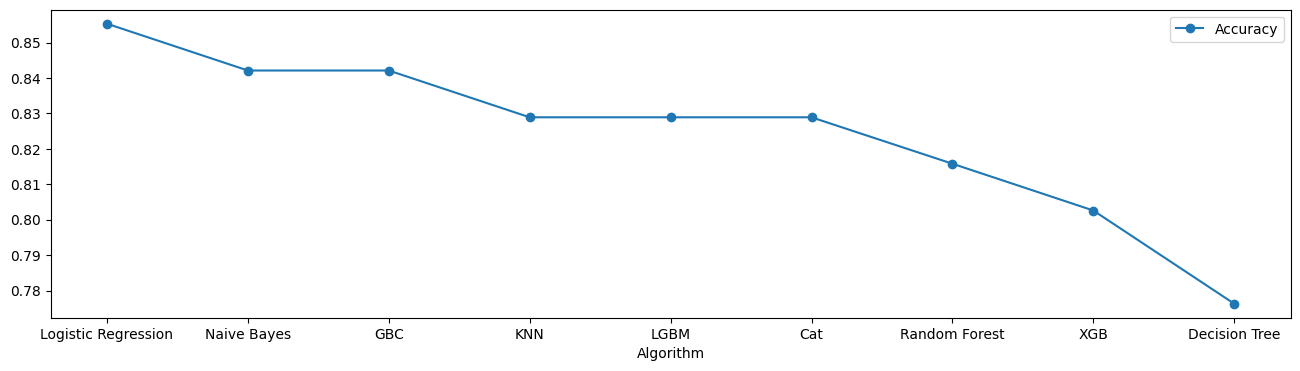

In [29]:
accuracy_results.plot( figsize=(16,4), marker='o' )

# Hyperparameter Tunning

In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 225 to 27
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       76 non-null     int64  
 1   sex       76 non-null     int64  
 2   cp        76 non-null     int64  
 3   trtbps    76 non-null     int64  
 4   chol      76 non-null     int64  
 5   fbs       76 non-null     int64  
 6   restecg   76 non-null     int64  
 7   thalachh  76 non-null     int64  
 8   exng      76 non-null     int64  
 9   oldpeak   76 non-null     float64
 10  slp       76 non-null     int64  
 11  caa       76 non-null     int64  
 12  thall     76 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 8.3 KB


In [55]:
model.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [80]:
import pickle
import uuid
import datetime
import numpy as np


import mlflow.pyfunc
model_name= "heart-attack-LR-model"
version = 1
model_uri = "models:/{model_name}/{version}".format(model_name=model_name,version=version)

#model = mlflow.pyfunc.load_model(model_uri=model_uri)
model = pickle.load(open('model.pkl', 'rb'))

# from domino_prediction_logging.prediction_client import PredictionClient
from domino_data_capture.data_capture_client import DataCaptureClient

features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']

target = ["target"]

# pred_client = PredictionClient(features, target)
data_capture_client = DataCaptureClient(features, target)

def test_predict(age, sex, cp, trtbps, chol, fbs, restecg, thalachh,
       exng, oldpeak, slp, caa, thall, _id=None):
    
    data = [ {
        "age" : age, 
        "sex" : sex, 
        "cp" : cp, 
        "trtbps" : trtbps, 
        "chol" : chol, 
        "fbs" : fbs, 
        "restecg" : restecg, 
        "thalachh" : thalachh,
        "exng" : exng, 
        "oldpeak" : oldpeak, 
        "slp" : slp, 
        "caa" :caa, 
        "thall" :thall
    }]
    df = pd.DataFrame(data)
    print(df)

    prediction = model.predict(df).tolist()


    # Record eventID and current time
    if _id is None:
        print("No ID found! Creating a new one.")
        _id = str(datetime.datetime.now())
        # custid = uuid.uuid4()
    print('ID is: {}'.format(_id))

    feature_values=[age, sex, cp, trtbps, chol, fbs, restecg, thalachh,
       exng, oldpeak, slp, caa, thall]
    # pred_client.record(feature_values, prediction, event_id=custid)
    data_capture_client.capturePrediction(feature_values, prediction,event_id=_id)

    return dict(prediction=prediction[0])

#result = predict(1,1,1,1,1,1,1)

In [81]:
json = [{"age" : 100, 
"sex" : 1, 
"cp" : 1, 
"trtbps" : 1, 
"chol" : 1, 
"fbs" : 1, 
"restecg" : 1, 
"thalachh" : 1,
"exng" : 1, 
"oldpeak" : 1, 
"slp" : 1, 
"caa" :1, 
"thall" :1
}]

df_test = pd.DataFrame(json)
#model.predict(df_test)
test_predict(1, 1,1,1,1, 1, 1,1,1,1, 1,1,1)


The information shown below represents the structure and format of the prediction data recorded by Domino when this model is deployed as a Domino Model API

{"predictions": {"target": 0}, "features": {"age": 1, "sex": 1, "cp": 1, "trtbps": 1, "chol": 1, "fbs": 1, "restecg": 1, "thalachh": 1, "exng": 1, "oldpeak": 1, "slp": 1, "caa": 1, "thall": 1}, "metadata": null, "timestamp": "2023-09-28T01:03:08.113982+00:00", "__domino_timestamp": "2023-09-28T01:03:08.113982+00:00", "event_id": "2023-09-28 01:03:08.113961", "prediction_probability": null, "sample_weight": null, "instance_id": null}
CONSOLE:domino_data_capture.logger:{"predictions": {"target": 0}, "features": {"age": 1, "sex": 1, "cp": 1, "trtbps": 1, "chol": 1, "fbs": 1, "restecg": 1, "thalachh": 1, "exng": 1, "oldpeak": 1, "slp": 1, "caa": 1, "thall": 1}, "metadata": null, "timestamp": "2023-09-28T01:03:08.113982+00:00", "__domino_timestamp": "2023-09-28T01:03:08.113982+00:00", "event_id": "2023-09-28 01:03:08.113961", "predictio

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    1    1   1       1     1    1        1         1     1        1    1   

   caa  thall  
0    1      1  
No ID found! Creating a new one.
ID is: 2023-09-28 01:03:08.113961


{'prediction': 0}

In [51]:
from sklearn.model_selection import GridSearchCV

def hiperparameter( algorithm, param_grid, run_name ):
    rkf = RepeatedKFold(n_splits=2, n_repeats=3)
    grid_search = GridSearchCV(algorithm, param_grid, cv=rkf, scoring='accuracy')
    model = make_pipeline( ct, grid_search)

    model.fit(X_train, y_train)
    # passing experiment_id tells MLflow to associate the run data with the correct experiment.
    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        if run_name is None:
            run_name = run.info.run_name
            
        print("Best Params")
        pretty_params = pprint.pformat(grid_search.best_params_, width=1, indent=2)
        print("******************************************")
        print("******************************************")
        print(f"Starting run {run_name} in experiment {experiment_id} with SVC params:")
        print(f"{pretty_params}")

        print("Recording run params, metrics, and artifacts to MLflow...")
        # record notable sklearn model params and performance metrics.
        # this enables visual comparison via the Experiments UI.
        for param, val in grid_search.best_params_.items():
            mlflow.log_param(param, val)

        best_model = grid_search.best_estimator_
        accuracy = make_pipeline( ct, best_model ).score(X_test, y_test)
        print("Best Accuracy {:.4f}".format(accuracy))
        print("Predicting using trained model...")
        predicted = best_model.predict(X_test)
        prediction_report_str = metrics.classification_report(y_test, predicted, digits=2, output_dict=False)
        prediction_report_dict = metrics.classification_report(y_test, predicted, output_dict=True)

        
        
        for metric in ("precision", "recall", "f1-score"):
            for digit in {str(num) for num in range(0, 1)}:
                mlflow.log_metric(f"{metric}_{digit}", prediction_report_dict[digit][metric])
            for avg_type in ("macro", "weighted"):
                mlflow.log_metric(f"{metric}_{avg_type}_avg", prediction_report_dict[f"{avg_type} avg"][metric])
        mlflow.log_metric("overall_accuracy", prediction_report_dict["accuracy"])
        
        print("Recording run params, metrics, and artifacts to MLflow...")
        pretty_params = pprint.pformat(grid_search.best_params_, width=1, indent=2)
        run_overview = (
            f"Run: {run_name}\n"
            #f"Random seed: {random_seed}\n"
            "Classifier type: sklearn.svm.SVC\n"
            "Specified classifier params:\n"
            f"{pretty_params}"
            "\n"
            "Classification report:\n"
            f"{prediction_report_str}\n"
        )
        print(f"{run_overview}")
        run_overview_file_name = "run_overview.txt"
        with open(run_overview_file_name, "w") as f:
            f.write(run_overview)
        # record human-readable/interpretable overview and figures
        mlflow.log_artifact(run_overview_file_name)
        # record the trained sklearn model
        mlflow.sklearn.log_model(model, f"model")
        

In [52]:
from sklearn.model_selection import RepeatedKFold
import pprint

param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['entropy'],
    'max_depth': [10, 20], 
    'min_samples_split': [5, 10],
    'min_samples_leaf': [ 4]
}

hiperparameter( RandomForestClassifier(), param_grid, 'RF' )

Best Params
******************************************
******************************************
Starting run RF in experiment 37 with SVC params:
{ 'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 100}
Recording run params, metrics, and artifacts to MLflow...
Best Accuracy 0.8289
Predicting using trained model...


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


type: X has 13 features, but RandomForestClassifier is expecting 30 features as input.

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs', 'saga', 'elasticnet']
}
hiperparameter( LogisticRegression(max_iter=10000), param_grid )

# Best Choice is Logistic Regression
# Score Best Accuracy 0.8553

In [41]:
import mlflow
import os
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split


In [33]:

username = os.environ['DOMINO_STARTING_USERNAME']
experiment_name = f"heart-attack-classifier-version 1"
# below, we'll use the returned experiment_id in calls to mlflow.start_run() to add data to the experiment.
#experiment_id = mlflow.create_experiment(experiment_name)

current_experiment=dict(mlflow.get_experiment_by_name(experiment_name))
experiment_id=current_experiment['experiment_id']


print(f"Experiment id: {experiment_id}")
print(f"Experiment name: {experiment_name}")

Experiment id: 37
Experiment name: heart-attack-classifier-version 1
